In [3]:
import sys, os
import pandas as pd


# importação dos dados
resultados_exames = pd.read_csv('../data/alura_cure.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
# segregação dos dados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143 # para uso do random no train_test_split
random.seed(SEED)
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnosticos = resultados_exames.diagnostico

valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnosticos, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

print("Resultado da classificação % 2f%%" %(classificador.score(teste_x, teste_y) * 100))

Resultado da classificação  92.397661%


In [5]:
# verificar dados vazio
# valores_exames.isnull().sum()


In [6]:
from sklearn.dummy import DummyClassifier
from numpy import random

SEED = 123143
random.seed(SEED)
classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação bobo % 2f%%" %(classificador_bobo.score(teste_x, teste_y) * 100))


Resultado da classificação bobo  66.666667%


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())


In [8]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnosticos, valores.iloc[:, inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  plt.figure(figsize=(10,10))
  sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
  plt.xticks(rotation=90)

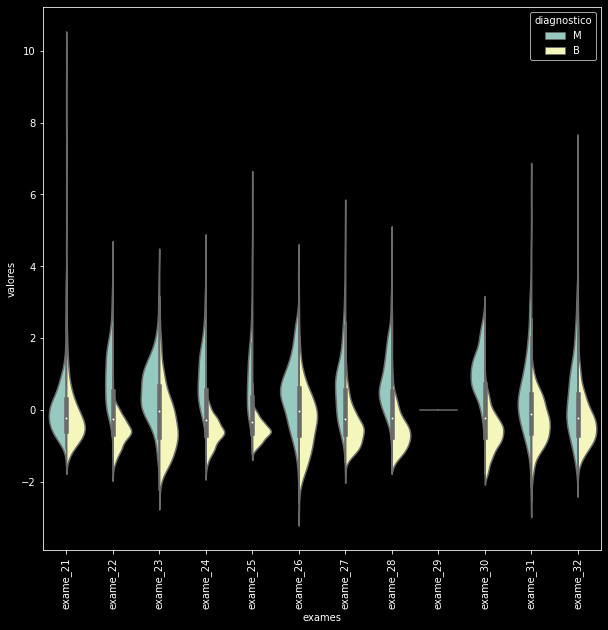

In [9]:
grafico_violino(valores_exames_v2, 20, 32)

In [10]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnosticos, test_size=0.3)
  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)

  print("Resultado da classificação % 2f%%" %(classificador.score(teste_x, teste_y) * 100))


classificar(valores_exames_v3)

Resultado da classificação  92.982456%


<AxesSubplot:>

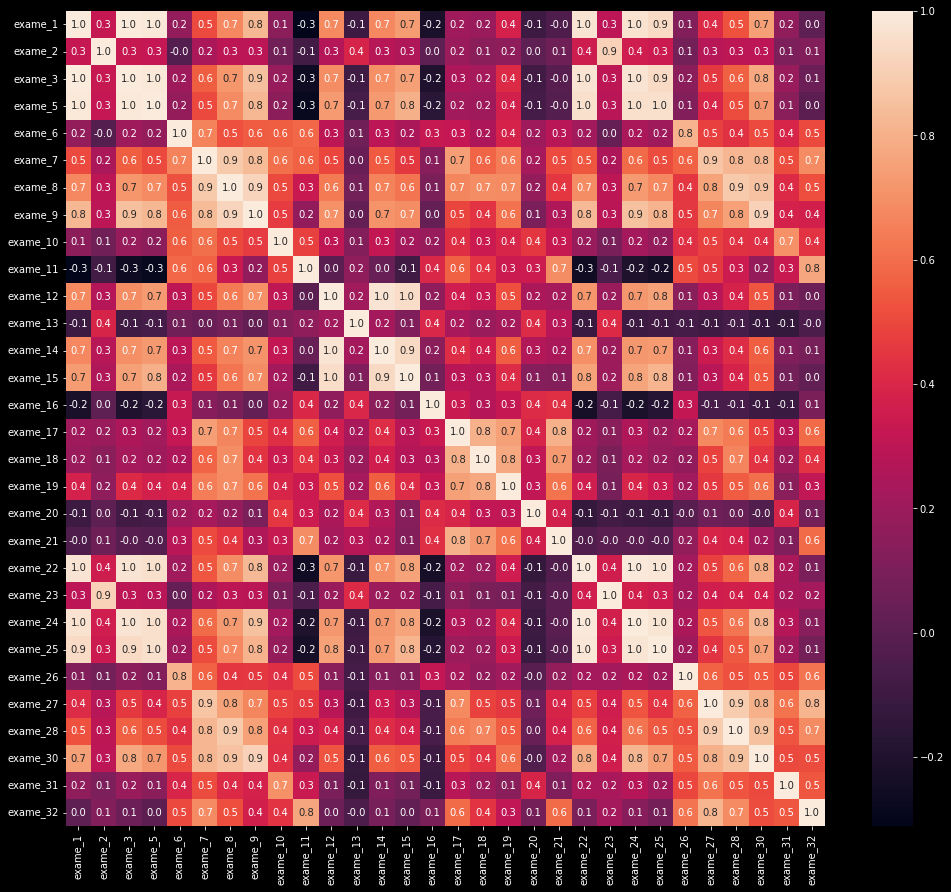

In [11]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [12]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v3 = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
matriz_correlacao_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [13]:
valores_exames_v4 = valores_exames_v3.drop(columns=matriz_correlacao_v3.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação  92.982456%


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 1234
random.seed(SEED)

selecionar_kmelhores = SelectKBest(chi2, k=5)
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_3", "exame_4", "exame_24","exame_29"])
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosticos, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)


In [21]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação % 2f%%" %(classificador.score(teste_kbest, teste_y) * 100))

Resultado da classificação  92.397661%


In [22]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 56.5, 'Predição'), Text(146.5, 0.5, 'Real')]

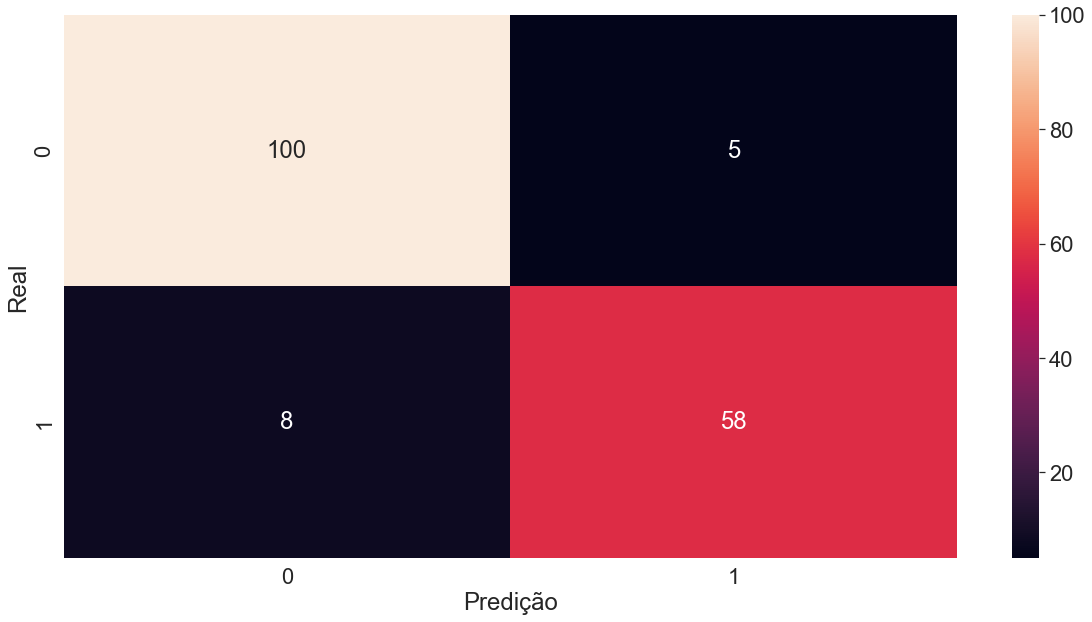

In [35]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição",ylabel="Real")

Resultado da classificação  90.058480%


[Text(0.5, 56.5, 'Predição'), Text(146.5, 0.5, 'Real')]

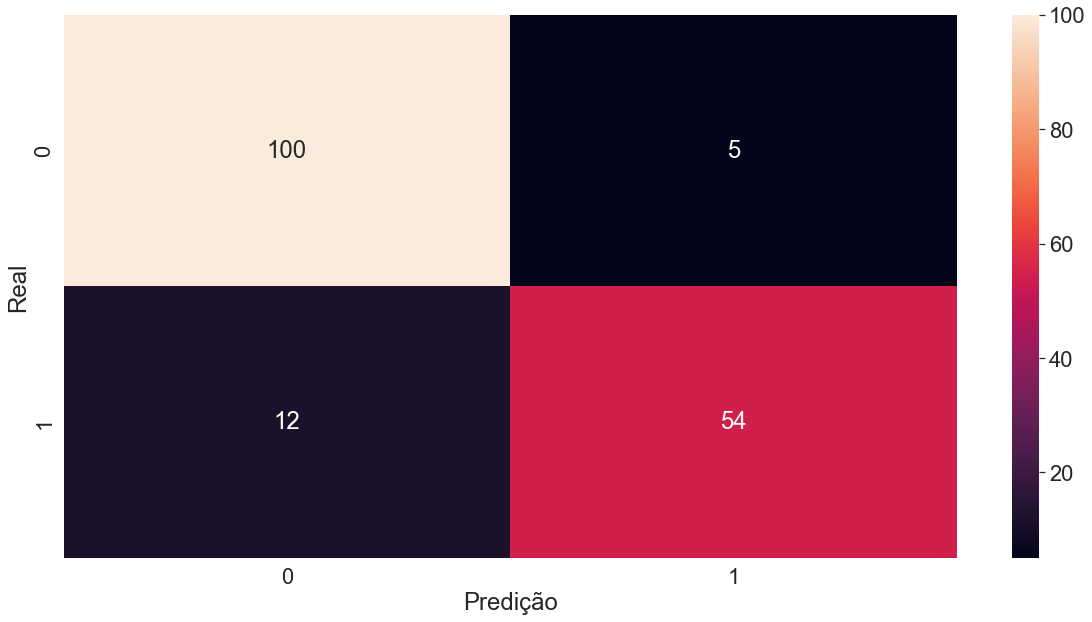

In [39]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosticos, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selector_rfe = RFE(estimator=classificador, n_features_to_select=5,step=1)
selector_rfe.fit(treino_x, treino_y)
treino_rfe = selector_rfe.transform(treino_x)
teste_rfe = selector_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação % 2f%%" %(classificador.score(teste_rfe, teste_y) * 100))

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição",ylabel="Real")

Resultado da classificação  92.982456%


[Text(0.5, 56.5, 'Predição'), Text(146.5, 0.5, 'Real')]

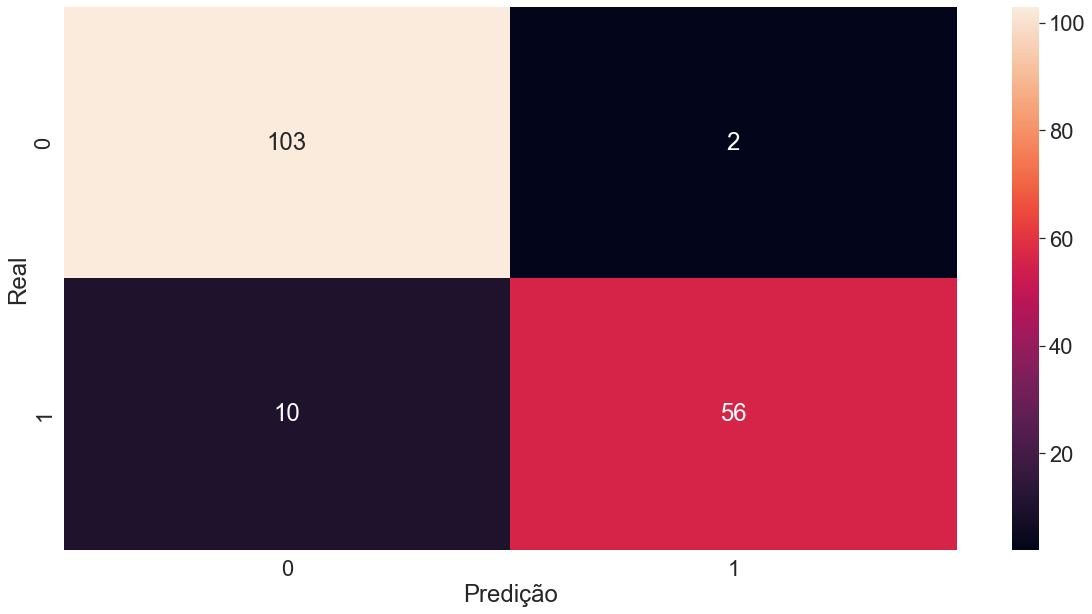

In [40]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosticos, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selector_rfecv = RFECV(estimator=classificador, cv=5,step=1, scoring="accuracy")
selector_rfecv.fit(treino_x, treino_y)
treino_rfecv = selector_rfecv.transform(treino_x)
teste_rfecv = selector_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print("Resultado da classificação % 2f%%" %(classificador.score(teste_rfecv, teste_y) * 100))

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição",ylabel="Real")

In [41]:
# quais features ou colunas são mais relevantes
treino_x.columns[selector_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

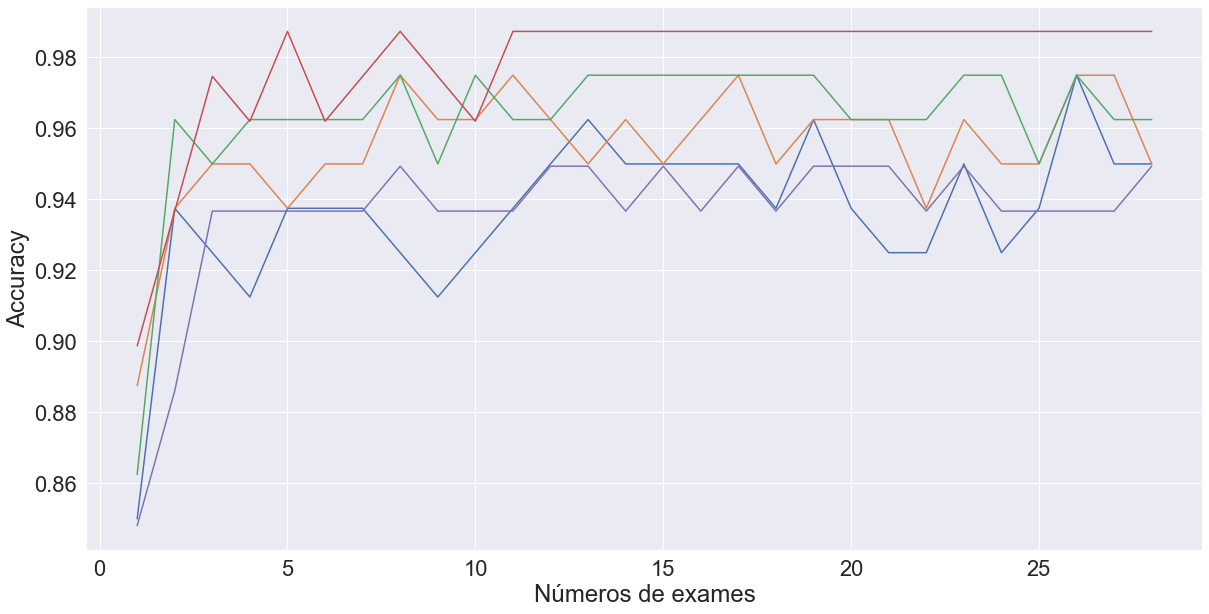

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.xlabel("Números de exames")
plt.ylabel("Accuracy")
# plt.grid()
plt.plot(range(1, len(selector_rfecv.grid_scores_) + 1), selector_rfecv.grid_scores_)
plt.show()